# Lab 06 : Problem Solving (part 1)

## Objectives

This is the first part of a two part lab.

We will work through the details of how to solve a problem.  This will include analytic manipulations, clear documentation, and parameter independent implementations.

The first part will mainly focus on setting up the problem and getting it into a form we can solve numerically.

## Initialization

As always, initialize your environment now by loading all modules required and setting up the plotting environment. We will also be using random numbers, so initialize `rng` as we have done in the past.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.interpolate as interp
import scipy.special as sf
import scipy.integrate as integ

# random number generator
rng = np.random.default_rng()

## Static Mass-Spring Configuration

In the next two labs we will write code that will allow us to determine the static configuration for a mass-spring system of the type shown below.  To do so we will iteratively use the Newton-Raphson method to solve a system of non-linear equations.  Before we can do that, we first need to set up the problem.  The set up is the main purpose of this lab!

![Static spring configuration](https://github.com/cwru-phys-250/p250-spring-2022/raw/main/figures/static_springs.png)

The figure above shows a conventional way to represent a system of two masses and three springs.  The choices of angles, labels for the springs, *etc.* may not be the easiest for a numerical implementation, but it is familiar to us from an introductory physics course.  Thus, our numerical solution must take inputs consistent with this figure and must also produce outputs consistent with it.

In our code we can choose to define things differently and map between the choices made in the figure and choices that we find more convenient.  This is always an issue when solving a problem, particularly numerically.  Though there may be a more convenient way to represent the information in our code, changing from the convention shown in the figure comes at a cost.  Ultimately we want our code to be understandable.  We want other people to be able to read it and we also want to be able to modify it ourselves, particularly if we come back months or years later.  We do not want to have to work hard to understand some different convention chosen at the moment when we were writing the code but now does not make sense to us!  Regardless of what choices we make, they must be clearly documented.

### Problem Specification

To solve this system we first need to know exactly what problem we want to solve.  Vaguely it is to determine the static configuration.  It is worth thinking about what that means for yourself.  For the lab we will clearly specify the system along with what input will be given and what output is to be produced.  You will be "guided" on how to think about and set up this problem.  That does not mean this will be the best approach.  This will be revisited at the end of the next lab.

When solving a problem we should try to be as general as possible.  Rarely are we really interesting in the exact problem given, instead we are interested in a class of problems and would like to be able to solve any in that class.  In this case we could imagine many generalizations to the system shown in the figure.  We could allow for many changes.
1. Arbitrary number of masses.
2. Arbitrary number of connecting springs to each mass.
3. Arbitrary number of support points.
4. Three dimensional configuration.

We should include generalizations in our code if they do not make the solution significantly more complicated.  For this lab you do not need to include such generalizations, but you should think about them.

Our problem will be: given two masses, $m_1$ and $m_2$, connected by three springs with spring constants $k_1$, $k_2$, and $k_3$ and natural lengths $\ell_{0,1}$, $\ell_{0,2}$, and $\ell_{0,3}$ at two support points separated by a distance $d$, determine the lengths $\ell_1$, $\ell_2$, and $\ell_3$ of the springs, along with the angles $\theta_1$, $\theta_2$, and $\theta_3$, in the static configuration.

Actually, before proceeding we can do more than that.  As is almost always the case we need to worry about units.  Yet units should not matter.  In fact, in the problem given does it matter if the distance between the support points is 1 cm, 1 meter, 1 mile, *etc.*?  No!  In general it is always best to work in terms of dimensionless quantities, that is, quantities that are relative to each other.  In this case we really do not care what $d$ is, all we really care about is how all the lengths in this system compare to $d$.  This means we can think of measuring all lengths in units of $d$, or equivalently that we will specify the natural lengths as the ratio $\ell_{0,i}/d$ and find the ratio of lengths $\ell_i/d$ as our solution.  Effectively this means that we can "just set" $d=1$ and when we say, for example, that $\ell_{0,1}=1.5$ we mean that $\ell_{0,1}=1.5 d$.  Similarly it is convenient to specify the masses in terms of some mass unit, it really does not matter what it is.  Let us call this mass $M$.  We will thus always specify things as a ratio of masses.  To make this more clear let us define $\mu_j \equiv m_j/M$.  Finally¸ instead of specifying the spring constants in some units we can normalize them with this mass scale too by defining $\kappa_i \equiv \frac{k_i d}{M g}$, where $g$ is the gravitational constant.

The new statment of our problem is as follows.  Given two normalize masses, $\mu_j$, and three springs with normalized spring constants, $\kappa_i$, and natural lengths, $\ell_{0,i}$ in units of $d$, determine in the static configuration the lengths of the springs, $\ell_i$ in units of $d$ along with the angles $\theta_i$.

### System of Equations

We need to find six quantities, $\ell_i$ and $\theta_i$, so we need six equations to solve.  Ultimately we will be able to write these equations in the form
$$ \vec f(\vec y) = 0 $$
and our goal will be to find the $\vec y$ that solves this system of nonlinear equations.

To begin we need the system of equations.  You will derive them and document them here.

What does it mean to "document"?  You should give enough information that either you, or a classmate, could easily follow the steps and reproduce your results.  This means you should not just give the final equations without any discussion/description, nor should you provide step-by-step algebraic manipulations.  Instead you should determine what are the key ideas, what are the key steps, what intermediate steps are worth seeings, and finally, what is the final result.

Derive a system of nonlinear equations of the form "left-hand side equals zero" for the mass-spring system.  Express your equations in terms of the quantites $\ell_i$ and $\theta_i$ given the inputs $\ell_{0,i}$, $\kappa_i$, and $\mu_j$.  Clearly describe your solution and document your equations giving their final form as a system of six equations, all written using `Markdown` and LaTeX.  As good, young physicists your first thought will be to draw free-body diagrams.  Follow the usual procedure you would from introductory physics and describe it below.

### Equations of motion
 
We get our first four equations restricting this system by drawing free body diagrams for both mass 1 and mass 2. Since this system is static, there is no acceleration, so $ F_{net}= 0 $. We can write down the forces present on each mass in the x and y directions, and then equate them to zero. These equations are shown below. 

Mass 1 in the x direction 

$$ -\kappa_3(l_{0,3}-l_3)\cos(\theta_3) + \kappa_1(l_{0,1}- l_1)\cos(\theta_1)= 0 $$

Mass 1 in the y direction 

$$ -\kappa_3(l_{0,3}-l_3)\sin(\theta_3) - \kappa_1(l_{0,1}-l_1)\sin(\theta_3) - \mu_1g= 0 $$

Mass 2 in the x direction 

$$ \kappa_3(l_{0,3}-l_3)\cos(\theta_3)- \kappa_2(l_{0,2}-l_2)\cos(\theta_2) = 0 $$

Mass 2 in the y direction

$$ \kappa_3(l_{0,3}-l_3)\sin(\theta_3)- \mu_2g- \kappa_2(l_{0,2}-l_2)\sin(\theta_2) = 0 $$

Another restriction on this system is that the x component of the lengths of the springs must be equal to d, or 1, since d is the normalization factor in our lengths. This gives us another equation as shown below. We then can convert this so that it is equal to zero.

$$ l_1\cos(\theta_1)+l_3\cos(\theta_3)+l_2\cos(\theta_2) = 1 $$
$$ l_1\cos(\theta_1)+l_3\cos(\theta_3)+l_2\cos(\theta_2) - 1= 0 $$

Another restriction on this system is that the horizontal force components of spring 1 and spring 2 must be equal. 

$$ -\kappa_1(l_{0,1}-l_1)\cos(\theta_1)- \kappa_2(l_{0,2}-l_2)\cos(\theta_2) = 0 $$

### Implementation of the System of Equations

The next step is to implement these equations.  In general we have choices to make in terms of how we order our variables.  Here the order will be specified for you.  **The order you must use** is
```
y = (l1, l2, l3, theta1, theta2, theta3)
```

You will now write a function that calculates your system of equations and returns it as a numpy array.  What order should you write the equations in?  It does not matter, however, you should make it easy to understand.  You chose an order to write them in your documentation above, use the same order here!  It will be far less confusing to the reader if you preserve this ordering.  In other words, be consistent between your documentation and code!

We will want our function to be "vectorized". This means we want our function to work even if `y` is given as a two dimensional array of shape $(6,N)$ for arbitrary $N$.  In other words, there will be six rows and an arbitrary number of columns.  If you write your function in the "natural" way with appropriate uses of things like `np.zeros_like`, it will "just work".  We will discuss more details of this next week.

Write a function to return the values of the left-side of your system of equations as a numpy array.  Your function must be of the form
```
def static_conditions(y, l0, kappa, mu):
```
where `y` is ordered as discussed above, `l0` is an array containing the natural lengths of the spring (in units of $d$), `kappa` are the normalized spring constants, and `mu` are the normalized masses.  **Clearly document your code.**

In [4]:
def static_conditions(y, l0, kappa, mu):
    """ This function contains the equations of motion and the restriction equations for the spring-mass system. All 
    values are normalized so that they are 'unitless'.

    Inputs:
    y: Array containing the lengths of the springs in d units and the theta angles in degrees in this order: 
    y=(l1, l2, l3, theta1, theta2, theta3)
    l0: Array containing the natural lengths of the springs in units of d in this order: l0= (l01, l02, l03)
    kappa: Array containing the spring constants in normalized units in this order: kappa= (K1, K2, K3)
    mu: Array containing the masses in normalized units in this order: mu= (mu1, mu2)

    Outputs:
    sol: This will return the array containing the right hand side values of the equations (i.e. sol[0] will be 
    the answer to the first equation) - these should all equal zero if the system is static
    
    Note: The equations listed here are in the same order as they are listed in this code's documentation
    """

    sol= np.zeros_like(y)
    g= 9.8
    y[3]= np.radians(y[3])
    y[4]= np.radians(y[4])
    y[5]= np.radians(y[5])
    
    sol[0]= -kappa[2]*(l0[2]- y[2])*np.cos(y[5]) + kappa[1]*(l0[0]- y[0])*np.cos(y[3])
    sol[1]= -kappa[2]*(l0[2]- y[2])*np.sin(y[5]) - kappa[0]*(l0[0]- y[0])*np.sin(y[5])- mu[0]*g
    sol[2]= kappa[2]*(l0[2]- y[2])*np.cos(y[5]) - kappa[1]*(l0[1]- y[1])*np.sin(y[4]) 
    sol[3]= kappa[2]*(l0[2]- y[2])*np.sin(y[5]) - kappa[1]*(l0[1]-y[1])*np.sin(y[4])- mu[1]*g
    sol[4]= y[0]*np.cos(y[3]) + y[2]*np.cos(y[5]) + y[1]*np.cos(y[4]) - 1 
    sol[5]= -kappa[0]*(l0[0]-y[0])*np.cos(y[3]) - kappa[1]*(l0[1]- y[1])*np.cos(y[4])

    return sol

### Testing

Now that we have written a function we are not done, it needs to work!  As we have seen, "work" means many things.  Of course it must be valid code: given the inputs it produces output.  It also must be correct code: given certain inputs it produces known, correct outputs.

Running the function to see if it produces output is easy, this is how you can debug your code.  Knowing that it produces correct output is more difficult.

Writing a complete test suite is hard work.  Simple test cases do not cover all possibilities.  While it is best to have as many and as complicated a set of tests as possible, we will be content with just a few, simple tests here.

The test cases should be *physical*.  They should be physical systems for which we know the answer.  They should not be based on the system of equations with some of the parameters set.  In other words, we should not plug some numbers into the system of equations and solve for the others.  We want to *test* the validity of the system of equations, not just verify that the computer can do arithmetic.

Here you will describe two physical test cases that can be used to verify that your system of equations and its implementation is correct.  These will be clearly documented using `Markdown` and LaTeX, describing the inputs and the expected outputs for these cases.
(*Hint:* What static configurations do we know?  In other words, for what conditions will $\vec f(\vec y)=0$?)

### Test 1

#### Description

Clearly describe your first test case.

If we let $l_03=1$ and $\theta_3=0$

#### Implementation

Implement your test case using `assert()` as discussed in the PreLab.

In [22]:
y= np.array([9.8,9.8,0,90,90,90])
l0= np.array([1,1,1])
kappa= np.array([1,1,100])
mu= np.array([1,1])
sol= static_conditions(y, l0, kappa, mu)
sol

array([-6.66207859e-15, -1.01000000e+02,  8.80000000e+00,  9.90000000e+01,
       -1.00000000e+00,  1.07768918e-15])

### Test 2

#### Description

Clearly describe your second test case.

YOUR ANSWER HERE

#### Implementation

Implement your test case using `assert()` as discussed in the PreLab.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### Two Dimensional Test

We next want to verify that our function runs for a two dimensional input for `y` but with the usual one dimensional inputs for all the other quantities.  Here we are just going to verify that it runs, not that the output is correct. Since the input is arbitrary, your output will not be an array of zeros, that is fine. However, we are going to input a $(6,4)$ array for `y` and **must** get a $(6,4)$ array as output.  If this is not the case, then you have not written your `static_conditions` function in a vectorized form.

Test that your version of `static_condition` returns something for a two dimensional array, `y`, of shape $(6, N)$.  You can use arbitrary inputs for the other variables (most easily just one of your test cases from above).  For `y` just use arbitrary values, for example,
```
y = rng.random(size=(6, 4))
```
The return value of `static_conditions` will not be zero, but that is fine.  We just want to see that it returns something with the same shape as `y`.  Again, we will spend more time talking about this next week and will learn why we need this!

(*Note:* You can use `assert` here too if you like.  You can compare the shapes of the arrays by comparing `y.shape` to the shape of the output of your `static_conditions` function.)

In [9]:
y= rng.random(size=(6,4))

l0= np.array([1,1,1])
kappa= np.array([3,3,3])
mu= np.array([1,1])

sol= static_conditions(y, l0, kappa, mu)
## function will work for two dimensional y values

assert(np.allclose(y.shape, sol.shape))

### Visualization

As we have seen, a good way to display results is through a figure.  Here there is not a clear figure to draw so instead we will "draw" the system.  Matplotlib is not designed for drawing diagrams!  Even so, we can make a simple plot that will represent the positions of the masses and the springs which can help us catch obvious errors in our results.  We will use this more next lab.  For now we just want to write the function to make the figure.

We will write a function that given the lengths and angles of the springs produces a plot showing the positions of the supports and masses as markers and springs as lines.  In this function you should **calculate all the positions**.  That is, let the leftmost support be at `(0,0)`.  From the input information calculate the positions of the masses **and the position of the final support**.  It may seem odd to do this, after all we *know* that the final support must be at `(1,0)`, so why calculate this?  By calculating it this does a couple of things.  Firstly, it allows us to display cases that do not satisfy our system of non-linear equations.  Secondly, it serves as a simple consistency check when are inputs do satisfy the system of non-linear equations.  Remember, part of the point of doing this is to test our results!

Write a function to produce a visualization of mass-spring system as described above.  You function must be of the form
```
def visualize_system(lengths, angles):
```
where `lengths` is an array containing the lengths of the springs in units of the separation, $d$, and `angles` is an array containing the angles of the springs in radians.  The orders in these arrays is the same as is labeled in the figure at the beginning of the lab.  Also draw a horiztonal line at the level of the supports (the ceiling).

We are creating a simple visualization so this does not need to be a detailed figure, we can construct it using simple means.

In [6]:
def visualize_system(lengths, angles):
    """ Calculates the positions of all the masses and springs, as well as the posiiton of the rightmost support
    in static system based on the spring lengths and angles
    
    Inputs:
    lengths: Array of the spring lengths in the order: lengths= (l1, l2, l3)
    angles: Array of the angles in degrees in the order: angles= (theta1, theta2, theta3)
    
    Outputs:
    Plot that graphs: 
    Position of the rightmost support
    Position of mass 1
    Position of mass 2
    Line that describes spring 1
    Line that describes spring 2
    Line that describes spring 3
    """

    angle1= np.radians(angles[0])
    angle2= np.radians(angles[1])
    angle3= np.radians(angles[2])

    m1_xpos= lengths[0]*np.cos(angle1)
    m1_ypos= -lengths[0]*np.sin(angle1)
    
    m2_xpos= lengths[0]*np.cos(angle1) + lengths[2]*np.cos(angle3)
    m2_ypos= -lengths[0]*np.sin(angle1) + lengths[2]*np.sin(angle3)
    
    rs_xpos= lengths[0]*np.cos(angle1) + lengths[2]*np.cos(angle3) + lengths[1]*np.cos(angle2)
    rs_ypos= -lengths[0]*np.sin(angle1) + lengths[2]*np.sin(angle3) + lengths[1]*np.sin(angle2)
    
    spring1_x = [0, m1_xpos]
    spring1_y = [0, m1_ypos]
    
    spring2_x = [m1_xpos, m2_xpos]
    spring2_y = [m1_ypos, m2_ypos]
    
    spring3_x = [m2_xpos, rs_xpos]
    spring3_y = [m2_ypos, rs_ypos]
    
    ax = plt.gca()
    ax.scatter(0,0, color='k')
    ax.scatter(m1_xpos, m1_ypos, color='b', label="Mass 1")
    ax.scatter(m2_xpos, m2_ypos, color='g', label= 'Mass 2')
    ax.scatter(rs_xpos, rs_ypos, color='k')
    ax.plot(spring1_x, spring1_y, color='r', ls='--', label='Spring 1')
    ax.plot(spring2_x, spring2_y, color='purple', ls='--', label= 'Spring 2')
    ax.plot(spring3_x, spring3_y, color='darkorange', ls='--', label= 'Spring 3')
    ax.axhline(0, color='k', ls=':')
    ax.legend()
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_title('Visual Representation of the Mass-Spring System')
    return ax  
        

Run your visualization function for one of your test cases.  The resulting figure must be what you expect!

<AxesSubplot:title={'center':'Visual Representation of the Mass-Spring System'}, xlabel='X Position', ylabel='Y Position'>

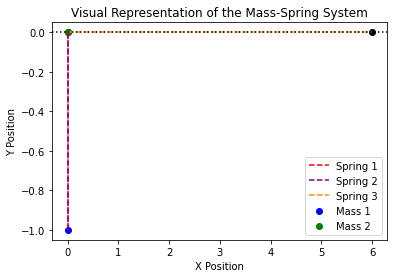

In [8]:
lengths= np.array([1, 6, 1])
angles= np.array([90, 0, 90])

visualize_system(lengths, angles)

## Member Participation

See Lab00 for instructions on turning in labs.  We will follow this procedure the entire semester.

In the following cell enter the *Case ID* for each student in the group who partcipated in this lab.  Again, see Lab00 for more details.  It is expected that you have read and understood those details.